In [2]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
import matplotlib as mpl

import vector
vector.register_awkward

<function vector.register_awkward() -> 'None'>

### Just loading columns and looking at them

In [ ]:
input = "/work/tharte/datasets/data_samples/bg_morph_2022_SPANET_baseline/output_DATA_JetMET_JMENano_E_2022_postEE_EraE.coffea"

o = load(f"{input}")
# print(o)
# print(o["columns"])
samples=list(o["columns"].keys())
print(f"Samples {samples}")
for sample in samples:
    datasets=list(o["columns"][sample].keys())
    print(f"Datasets {datasets}")
    for dataset in datasets:
        categories=list(o["columns"][sample][dataset].keys())
        print(f"Categories {categories}")
        for category in categories:
            col=o["columns"][sample][dataset][category]
            print(f"Columns {col.keys()}")

# Fix the columns I want:
sample = samples[0]
dataset = datasets=list(o["columns"][sample].keys())[0]
categories=list(o["columns"][sample][dataset].keys())

print(sample)
print(dataset)
print(categories)

col_4b = o["columns"][sample][dataset][categories[0]]


Samples ['DATA_JetMET_JMENano_E_skimmed']
Datasets ['DATA_JetMET_JMENano_E_2022_postEE_EraE']
Categories ['4b_control_region', '2b_control_region_preW', '4b_signal_region', '2b_signal_region_preW', '2b_control_region_postW', '2b_signal_region_postW', '2b_control_region_postWRun2', '2b_signal_region_postWRun2', '4b_control_regionRun2', '2b_control_region_preWRun2', '4b_signal_regionRun2', '2b_signal_region_preWRun2']
Columns dict_keys(['weight', 'events_HT', 'events_sigma_over_higgs1_reco_mass', 'events_sigma_over_higgs2_reco_mass', 'events_era', 'events_dR_min', 'events_dR_max', 'HH_dPhi', 'HH_phi', 'HH_mass', 'HH_dR', 'HH_pt', 'HH_dEta', 'HH_eta', 'HH_Costhetastar_CS', 'HiggsLeading_dPhi', 'HiggsLeading_phi', 'HiggsLeading_mass', 'HiggsLeading_dR', 'HiggsLeading_pt', 'HiggsLeading_dEta', 'HiggsLeading_eta', 'HiggsLeading_helicityCosTheta', 'HiggsSubLeading_dPhi', 'HiggsSubLeading_phi', 'HiggsSubLeading_mass', 'HiggsSubLeading_dR', 'HiggsSubLeading_pt', 'HiggsSubLeading_dEta', 'HiggsSu

In [ ]:
input = "/work/tharte/datasets/sample_spanet/loose_selection/output_all.coffea"
input_01_10 = "/work/tharte/datasets/sample_spanet/loose_selection_random_pt_mass_01_10/output_all.coffea"
input_05_15 = "/work/tharte/datasets/sample_spanet/loose_selection_random_pt_mass/output_all.coffea"
input_03_17 = "/work/tharte/datasets/sample_spanet/loose_selection_random_pt_mass_wide/output_all.coffea"
input = "/work/tharte/datasets/data_samples/bg_morph_2022_SPANET_baseline/output_DATA_JetMET_JMENano_C_2022_preEE_EraC.coffea"


o_01_10 = load(f"{input_01_10}")
o_03_17 = load(f"{input_03_17}")
o_05_15 = load(f"{input_05_15}")
o = load(f"{input}")
# print(o)
# print(o["columns"])
samples=list(o["columns"].keys())
print(f"Samples {samples}")
for sample in samples:
    datasets=list(o["columns"][sample].keys())
    print(f"Datasets {datasets}")
    for dataset in datasets:
        categories=list(o["columns"][sample][dataset].keys())
        print(f"Categories {categories}")
        for category in categories:
            col=o["columns"][sample][dataset][category]
            print(f"Columns {col.keys()}")

# Fix the columns I want:
sample = samples[0]
dataset = datasets=list(o["columns"][sample].keys())[0]
categories=list(o["columns"][sample][dataset].keys())

print(sample)
print(dataset)
print(categories)

col_4b = o["columns"][sample][dataset][categories[0]]
col_4b_01_10 = o_01_10["columns"][sample][dataset][categories[0]]
col_4b_03_17 = o_03_17["columns"][sample][dataset][categories[0]]
col_4b_05_15 = o_05_15["columns"][sample][dataset][categories[0]]

In [3]:
### PT ###
print(col_4b.keys())

jets_pt = col_4b["JetGood_pt"].value
jets_n = col_4b["JetGood_N"].value
print(jets_pt)
print(jets_n)
print(jets_pt.shape)

## Unflatten array
jets_by_event = ak.unflatten(jets_pt, jets_n)
print(jets_by_event)
jets_5 = ak.pad_none(jets_by_event, 5, clip=True)
jets_5 = ak.fill_none(jets_5, -999)

jets_5 = ak.to_numpy(jets_5).T
print(jets_5)

# 01_10
jets_pt = col_4b_01_10["JetGood_pt"].value
jets_n = col_4b_01_10["JetGood_N"].value
jets_by_event_01_10 = ak.unflatten(jets_pt, jets_n)
jets_5_01_10 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_01_10,5,clip=True),-999)).T
# 03_17
jets_pt = col_4b_03_17["JetGood_pt"].value
jets_n = col_4b_03_17["JetGood_N"].value
jets_by_event_03_17 = ak.unflatten(jets_pt, jets_n)
jets_5_03_17 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_03_17,5,clip=True),-999)).T
# 05_15
jets_pt = col_4b_05_15["JetGood_pt"].value
jets_n = col_4b_05_15["JetGood_N"].value
jets_by_event_05_15 = ak.unflatten(jets_pt, jets_n)
jets_5_05_15 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_05_15,5,clip=True),-999)).T

dict_keys(['weight', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_mass', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodMatched_N', 'JetGoodMatched_provenance', 'JetGoodMatched_pt', 'JetGoodMatched_eta', 'JetGoodMatched_phi', 'JetGoodMatched_mass', 'JetGoodMatched_btagPNetB', 'JetGoodHiggs_N', 'JetGoodHiggs_pt', 'JetGoodHiggs_eta', 'JetGoodHiggs_phi', 'JetGoodHiggs_mass', 'JetGoodHiggs_btagPNetB', 'JetGood_N', 'JetGood_pt', 'JetGood_eta', 'JetGood_phi', 'JetGood_mass', 'JetGood_btagPNetB'])
[195.92712  194.31169   60.421677 ...  77.05507   34.158195  27.181503]
[5 8 5 ... 4 4 6]
(4174304,)
[[196, 194, 60.4, 157, 41.7], [140, 34.7, ... [164, 219, 148, 77.1, 34.2, 27.2]]
[[ 195.92712402  140.23809814  132.12083435 ...  122.26894379
   101.58388519  164.41925049]
 [ 194.31169128   34.74516296   60.60025406 ...   35.74037933
    44.01526642  218.93191528]
 [  60.42167664  123.975242

### Trying to find the structure and to find out how to load a .parquet file

In [21]:
input = "/work/tharte/datasets/testing/histograms/output_GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE.coffea"

o = load(f"{input}")
print(o.keys())
print(o["variables"]["sig_bkg_dnn_score"])
# print(o["columns"])
# samples=list(o["columns"].keys())
# print(f"Samples {samples}")
# for sample in samples:
#     datasets=list(o["columns"][sample].keys())
#     print(f"Datasets {datasets}")
#     for dataset in datasets:
#         categories=list(o["columns"][sample][dataset].keys())
#         print(f"Categories {categories}")
#         for category in categories:
#             col=o["columns"][sample][dataset][category]
#             print(f"Columns {col.keys()}")

# # Fix the columns I want:
# sample = samples[0]
# dataset = datasets=list(o["columns"][sample].keys())[0]
# categories=list(o["columns"][sample][dataset].keys())

# print(sample)
# print(dataset)
# print(categories)

# col_4b = o["columns"][sample][dataset][categories[0]]


dict_keys(['sum_genweights', 'sum_signOf_genweights', 'sumw', 'sumw2', 'cutflow', 'variables', 'columns', 'processing_metadata', 'datasets_metadata'])
defaultdict(<class 'dict'>, {'GluGlutoHHto4B_spanet_skimmed': {'GluGlutoHHto4B_spanet_kl-1p00_kt-1p00_c2-0p00_2022_postEE': Hist(
  StrCategory(['2b_control_region_postW', '2b_control_region_preW', '2b_signal_region_postW', '2b_signal_region_postW_blind', '2b_signal_region_preW', '2b_signal_region_preW_blind', '4b_control_region', '4b_region', '4b_signal_region', '4b_signal_region_blind'], name='cat', label='Category'),
  StrCategory(['AK4PFPuppi_JERDown', 'AK4PFPuppi_JERUp', 'AK4PFPuppi_JES_TotalDown', 'AK4PFPuppi_JES_TotalUp', 'nominal'], name='variation', label='Variation'),
  Regular(20, 0, 1, name='events.sig_bkg_dnn_score', label='Signal vs Background DNN score'),
  storage=Weight()) # Sum: WeightedSum(value=67008.8, variance=1.05292e+06)}})


#### Trying to load data from parquet


In [122]:
import os
import glob
import numpy as np
import pandas as pd


def get_columns_from_parquet(input_files, filter_lambda=None, debug=False):
    cat_col = {}
    total_datasets_list = []
    dirs_datasets = {}

    for input_file in input_files:
        dir, dset = get_parquet_save_directory(input_file)
        dirs_datasets[dir] = dset

    for rootdir, sel_dataset in dirs_datasets.items():
        if debug:
            print(f"Scanning {rootdir}")
        datasets = os.listdir(rootdir) if sel_dataset == "all" else [sel_dataset]
        print(datasets)

        # structure: root/dataset/category/variation/*.parquet
        for dataset in datasets:
            dataset_path = os.path.join(rootdir, dataset)
            print(dataset_path)
            if not os.path.isdir(dataset_path):
                continue

            if dataset not in total_datasets_list:
                total_datasets_list.append(dataset)

            for category in os.listdir(dataset_path):
                category_path = os.path.join(dataset_path, category)
                if not os.path.isdir(category_path):
                    continue

                if debug:
                    print(f"dataset {dataset}, category {category}")

                if category not in cat_col:
                    cat_col[category] = {}

                for variation in os.listdir(category_path):
                    variation_path = os.path.join(category_path, variation)
                    if not os.path.isdir(variation_path):
                        continue

                    if variation not in cat_col[category]:
                        cat_col[category][variation] = {}

                    parquet_files = glob.glob(os.path.join(variation_path, "*.parquet"))
                    if debug:
                        print(f"  variation {variation}, files: {len(parquet_files)}")

                    for pqfile in parquet_files:
                        df = pd.read_parquet(pqfile)

                        for i, column in enumerate(df.columns):
                            # filter with lambda function
                            if filter_lambda is not None:
                                if not filter_lambda(column):
                                    if debug:
                                        print(f"Skipping column {column} due to filter")
                                    continue

                            column_array = df[column].to_numpy()

                            # normalize weights (if sum_genweights exists somewhere you may pass it separately)
                            if column == "weight" and "sum_genweights" in df.columns:
                                denom = df["sum_genweights"].iloc[0]
                                print(denom)
                                if denom != 0:
                                    column_array = column_array / denom

                            if column not in cat_col[category][variation]:
                                cat_col[category][variation][column] = column_array
                            else:
                                cat_col[category][variation][column] = np.concatenate(
                                    (cat_col[category][variation][column], column_array)
                                )

                            if i == 0 and debug:
                                print(
                                    f"column {column}",
                                    column_array.shape,
                                    cat_col[category][variation][column].shape,
                                )

    return cat_col, total_datasets_list

def get_parquet_save_directory(input_parquet):
    dataset = input_parquet.split("/")[-1].split(".")[0].split("_", 1)[-1]
    config_json_path = os.path.join(os.path.dirname(input_parquet), "config.json")
    try:
        with open(config_json_path, "r") as f:
            config = json.load(f)
        col_dir = config["workflow"]["workflow_options"]["dump_columns_as_arrays_per_chunk"]
        # Strip the redirector (e.g. root://t3dcachedb03.psi.ch:1094/) from the path if it exists
        if col_dir is not None and "://" in col_dir:
            col_dir = col_dir.split("://")[-1].split("/", 1)[-1]
            col_dir = "/" + col_dir.split("/", 1)[-1]
        print(f"dump_columns_as_arrays_per_chunk: {col_dir}")
    except Exception as e:
        print(f"Could not determine save directory (probably bad config.json): {e}")
        return None
    return col_dir, dataset


In [ ]:
from coffea.util import load
import numpy as np

def get_columns_from_files(inputfiles, filter_lambda=None, sel_var="nominal", debug=False):
    cat_col = {}
    total_datasets_list = []
    # get the columns
    for inputfile in inputfiles:
        accumulator = load(inputfile)
        samples = list(accumulator["columns"].keys())
        if accumulator["columns"]=={}:
            print(f"Empty columns, trying to read from parquet files")
            return get_columns_from_parquet(inputfiles, filter_lambda, debug)
        if debug: print(f"inputfile {inputfile}")
        print(f"columns keys: {list(accumulator['columns'].keys())}")
        for sample in samples:
            if debug: print(f"sample {sample}")
            datasets = list(accumulator["columns"][sample].keys())
            for dataset in datasets:
                if dataset not in total_datasets_list:
                    total_datasets_list.append(dataset)
                if debug: print(f"dataset {dataset}")
                categories = list(accumulator["columns"][sample][dataset].keys())
                for category in categories:
                    if debug: print(f"category {category}")
                    if category not in cat_col:
                        cat_col[category] = {}
                    variations = list(accumulator["columns"][sample][dataset][category].keys())
                    print(sel_var)
                    if sel_var.lower()=="all":
                        print("loading all variations")
                        for variation in variations:
                            if debug: print(f"variation {variation}")
                            if variation not in cat_col[category]:
                                cat_col[category][variation] = {}
                            cat_col[category][variation] = fill_category(accumulator["columns"][sample][dataset][category], accumulator["sum_genweights"], dataset, filter_lambda, variation, debug)
                    elif str(sel_var) in variations:
                        cat_col[category] = fill_category(accumulator["columns"][sample][dataset][category], accumulator["sum_genweights"], dataset, filter_lambda, sel_var, debug)
                    else:
                        raise ValueError(f"Variation {sel_var} not found in variations {variations}")
    return cat_col, total_datasets_list

def fill_category(accumulator, sum_genweights, dataset, filter_lambda, variation, debug):
    coldict = {}
    columns = list(
        accumulator[variation].keys()
    )
    for i, column in enumerate(columns):
        #filter with lamda function
        if filter_lambda is not None:
            if not filter_lambda(column):
                if debug: print(f"Skipping column {column} due to filter")
                continue
        column_array = accumulator[variation][column].value
        
        if column == "weight" and dataset  in sum_genweights:
            column_array = column_array / sum_genweights[dataset]

        if column not in coldict:
            coldict[column] = column_array
        else:
            print("concatenating")
            coldict[column] = np.concatenate(
                (coldict[column], column_array)
            )
        if i == 0:
            if debug: print(
                f"column {column}",
                column_array.shape,
                coldict[column].shape,
            )
    return coldict

In [129]:

import json

input_parquet = "/work/tharte/datasets/testing/histograms_parquet/output_GluGlutoHHto4B_official_kl-1p00_kt-1p00_c2-0p00_2022_preEE.coffea"

cat_col, total_datasets_list = get_columns_from_files([input_parquet], debug=True)

print(cat_col.keys())



inputfile /work/tharte/datasets/testing/histograms_parquet/output_GluGlutoHHto4B_official_kl-1p00_kt-1p00_c2-0p00_2022_preEE.coffea
dict_keys([])


In [125]:
input_coffea = "/work/tharte/datasets/testing/histograms_coffea/output_GluGlutoHHto4B_official_kl-1p00_kt-1p00_c2-0p00_2022_preEE.coffea"
cat_col_coffea, total_datasets_list_files = get_columns_from_files([input_coffea], sel_var="All", debug=True)

inputfile /work/tharte/datasets/testing/histograms_coffea/output_GluGlutoHHto4B_official_kl-1p00_kt-1p00_c2-0p00_2022_preEE.coffea
sample GluGlutoHHto4B
dataset GluGlutoHHto4B_official_kl-1p00_kt-1p00_c2-0p00_2022_preEE
category 4b_region
All
loading all variations
variation nominal
column weight (183,) (183,)
variation AK4PFPuppi_JERDown
column weight (183,) (183,)
variation AK4PFPuppi_JERUp
column weight (183,) (183,)
variation AK4PFPuppi_JES_TotalUp
column weight (183,) (183,)
variation AK4PFPuppi_JES_TotalDown
column weight (183,) (183,)
category 4b_control_region
All
loading all variations
variation nominal
column weight (43,) (43,)
variation AK4PFPuppi_JERDown
column weight (43,) (43,)
variation AK4PFPuppi_JERUp
column weight (43,) (43,)
variation AK4PFPuppi_JES_TotalUp
column weight (43,) (43,)
variation AK4PFPuppi_JES_TotalDown
column weight (43,) (43,)
category 2b_control_region_preW
All
loading all variations
variation nominal
column weight (23,) (23,)
variation AK4PFPuppi_JE

dict_keys(['nominal', 'AK4PFPuppi_JERDown', 'AK4PFPuppi_JERUp', 'AK4PFPuppi_JES_TotalUp', 'AK4PFPuppi_JES_TotalDown'])
124
124


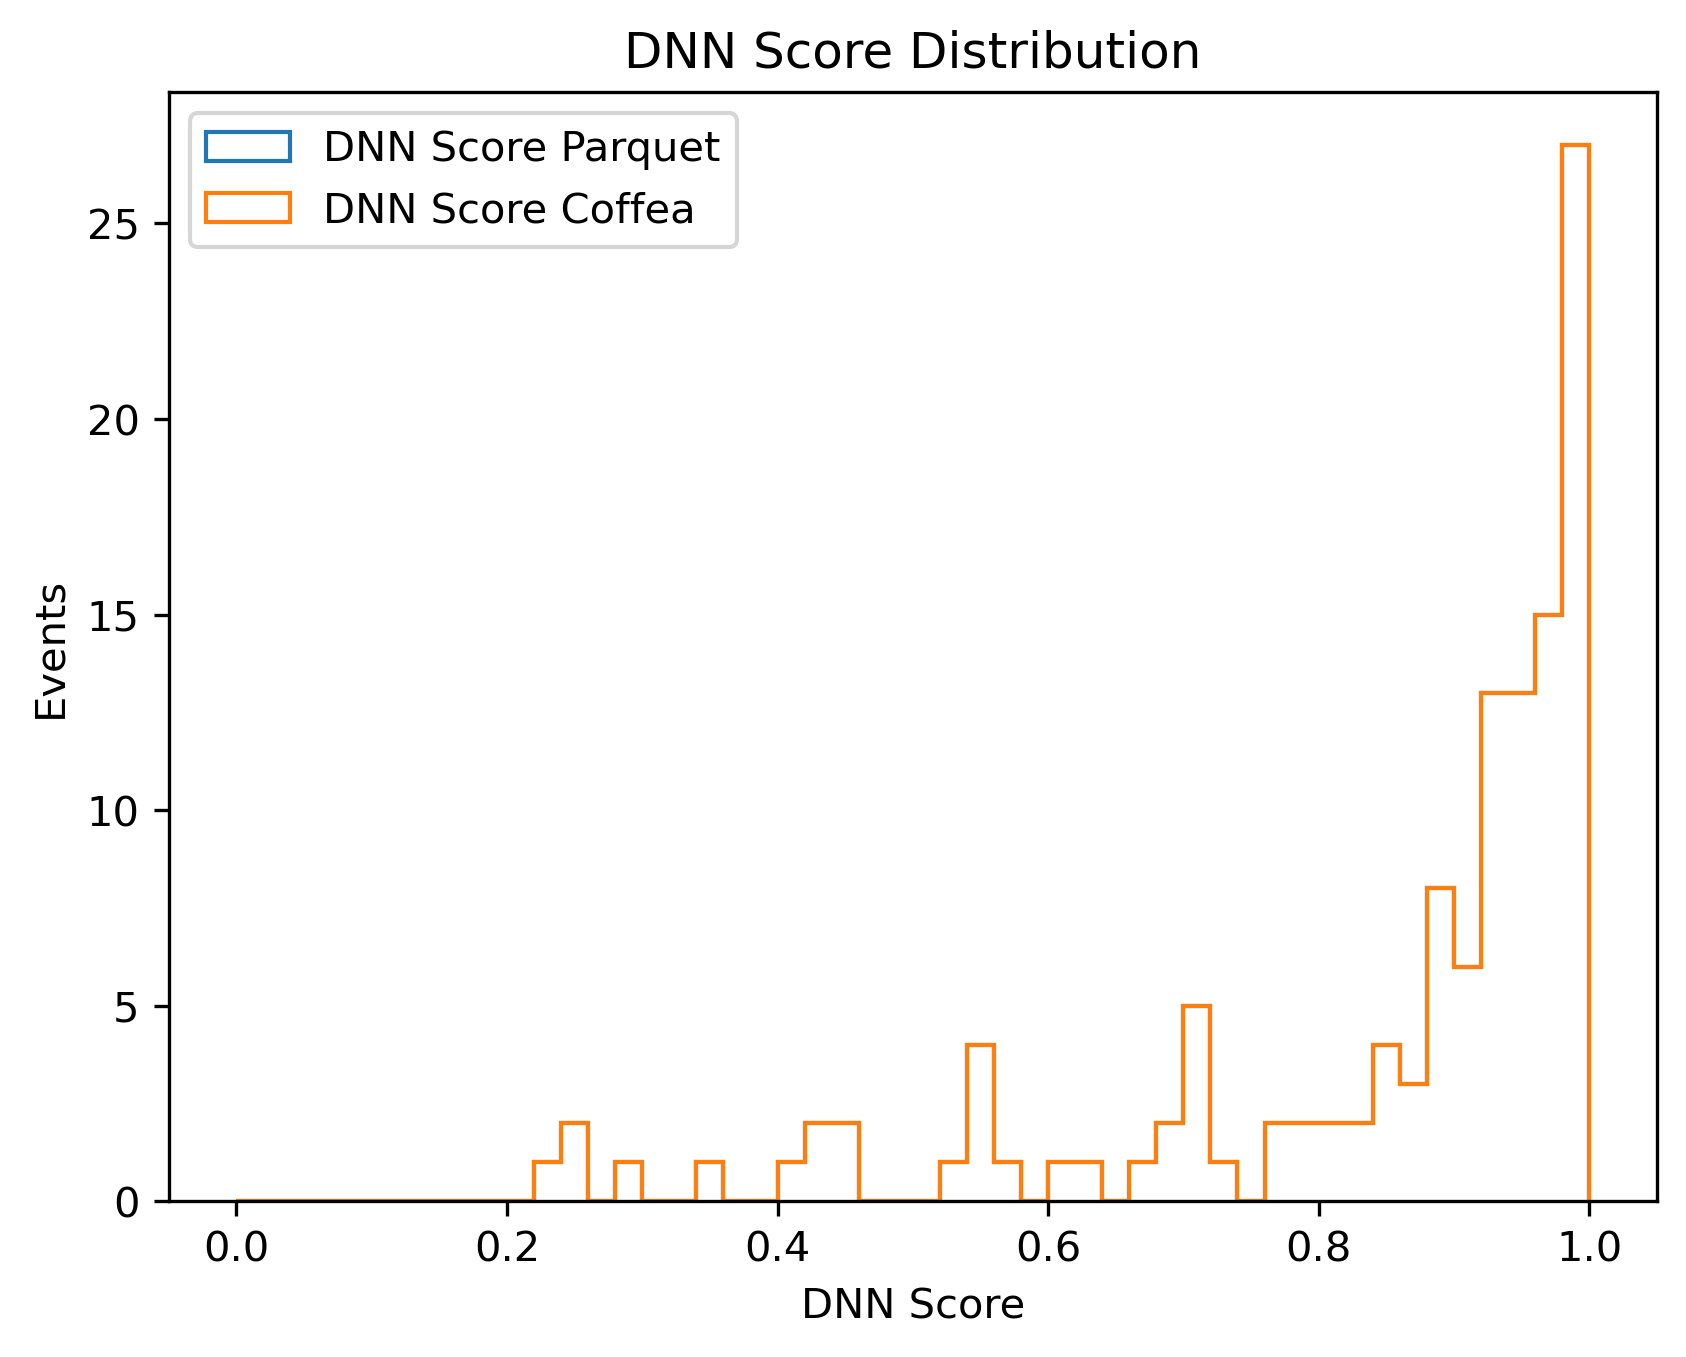

In [128]:
print(cat_col_coffea["4b_signal_region"].keys())
dnn_scores = cat_col["4b_signal_region"]["nominal"]["events_sig_bkg_dnn_score"]
dnn_scores_coffea = cat_col_coffea["4b_signal_region"]["nominal"]["events_sig_bkg_dnn_score"]
print(len(dnn_scores))
print(len(dnn_scores_coffea))
# Very simple plot for dnn_scores
plt.figure()
plt.hist(dnn_scores, bins=50, range=(0,1), histtype='step', label='DNN Score Parquet')
plt.hist(dnn_scores_coffea, bins=50, range=(0,1), histtype='step', label='DNN Score Coffea')
plt.xlabel('DNN Score')
plt.ylabel('Events')
plt.title('DNN Score Distribution')
plt.legend()
plt.show()



### Not used

In [89]:
### mass ###
print(col_4b.keys())

jets_pt = col_4b["JetGood_mass"].value
jets_n = col_4b["JetGood_N"].value
print(jets_pt)
print(jets_n)
print(jets_pt.shape)

## Unflatten array
jets_by_event = ak.unflatten(jets_pt, jets_n)
print(jets_by_event)
jets_5 = ak.pad_none(jets_by_event, 5, clip=True)
jets_5 = ak.fill_none(jets_5, -999)

jets_5 = ak.to_numpy(jets_5).T
print(jets_5)

# 01_10
jets_pt = col_4b_01_10["JetGood_mass"].value
jets_n = col_4b_01_10["JetGood_N"].value
jets_by_event_01_10 = ak.unflatten(jets_pt, jets_n)
jets_5_01_10 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_01_10,5,clip=True),-999)).T
# 03_17
jets_pt = col_4b_03_17["JetGood_mass"].value
jets_n = col_4b_03_17["JetGood_N"].value
jets_by_event_03_17 = ak.unflatten(jets_pt, jets_n)
jets_5_03_17 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_03_17,5,clip=True),-999)).T
# 05_15
jets_pt = col_4b_05_15["JetGood_mass"].value
jets_n = col_4b_05_15["JetGood_N"].value
jets_by_event_05_15 = ak.unflatten(jets_pt, jets_n)
jets_5_05_15 = ak.to_numpy(ak.fill_none(ak.pad_none(jets_by_event_05_15,5,clip=True),-999)).T

dict_keys(['weight', 'JetGoodHiggsMatched_N', 'JetGoodHiggsMatched_provenance', 'JetGoodHiggsMatched_pt', 'JetGoodHiggsMatched_eta', 'JetGoodHiggsMatched_phi', 'JetGoodHiggsMatched_mass', 'JetGoodHiggsMatched_btagPNetB', 'JetGoodMatched_N', 'JetGoodMatched_provenance', 'JetGoodMatched_pt', 'JetGoodMatched_eta', 'JetGoodMatched_phi', 'JetGoodMatched_mass', 'JetGoodMatched_btagPNetB', 'JetGoodHiggs_N', 'JetGoodHiggs_pt', 'JetGoodHiggs_eta', 'JetGoodHiggs_phi', 'JetGoodHiggs_mass', 'JetGoodHiggs_btagPNetB', 'JetGood_N', 'JetGood_pt', 'JetGood_eta', 'JetGood_phi', 'JetGood_mass', 'JetGood_btagPNetB'])
[20.542295 18.657415  9.272059 ... 15.371236  5.633121  5.861481]
[5 8 5 ... 4 4 6]
(4174304,)
[[20.5, 18.7, 9.27, 19.2, 8.6], [20, ... [22.7, 23.1, 24.8, 15.4, 5.63, 5.86]]
[[  20.54229546   19.96359634   16.83197212 ...   12.68430042
     7.67598104   22.71581841]
 [  18.65741539    6.12312222    7.12320375 ...    5.31186438
     7.83053255   23.09416771]
 [   9.27205944    6.67104101   10.

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

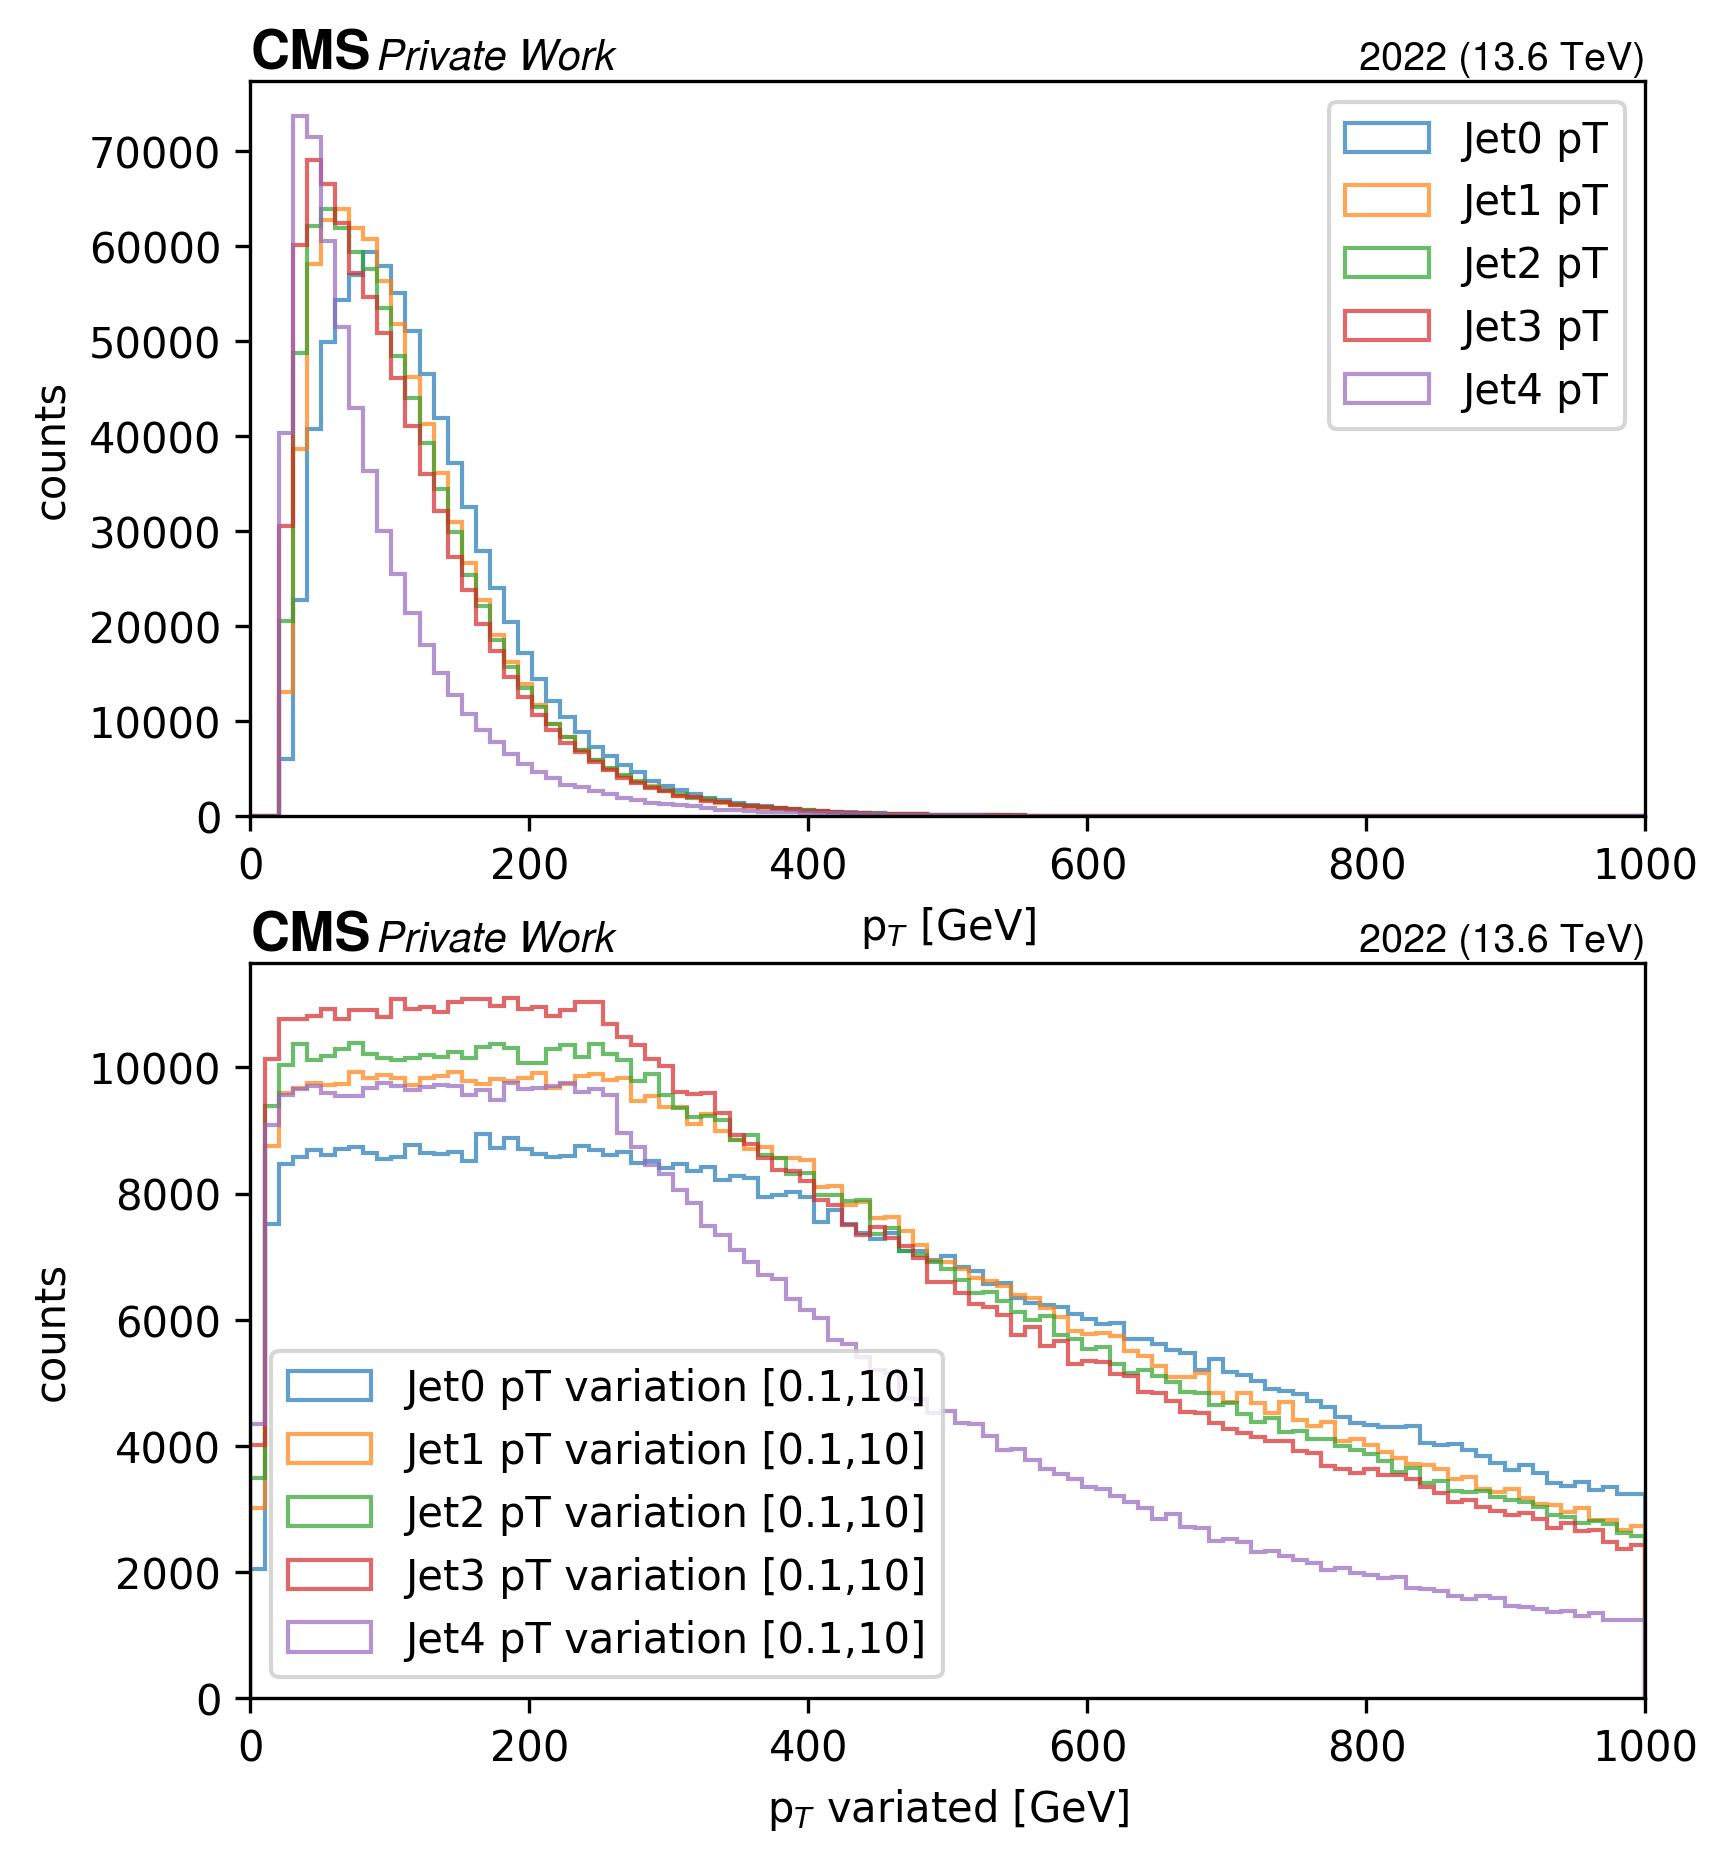

In [16]:
bins = np.linspace(0,1000,100)
fig, (ax1,ax2) = plt.subplots(2,figsize=(6,7))
fig.suptitle=("jet_p$_T$ variation")

cols = ["blue","orange","darkgoldenrod","tan"]
for idx, jet in enumerate(jets_5):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax1.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} pT", alpha=0.7, linewidth=1, histtype="step")

for idx, jet in enumerate(jets_5_01_10):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax2.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} pT variation [0.1,10]", alpha=0.7, linewidth=1, histtype="step")

ax1.set_xlabel(r"p$_T$ [GeV]")
ax2.set_xlabel(r"p$_T$ variated [GeV]")
for ax in [ax1,ax2]:
    ax.set_ylabel(r"counts")
    ax.set_xlim(0,1000)
    ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax1,
    data=True
)
hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax2,
    data=True
)



(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

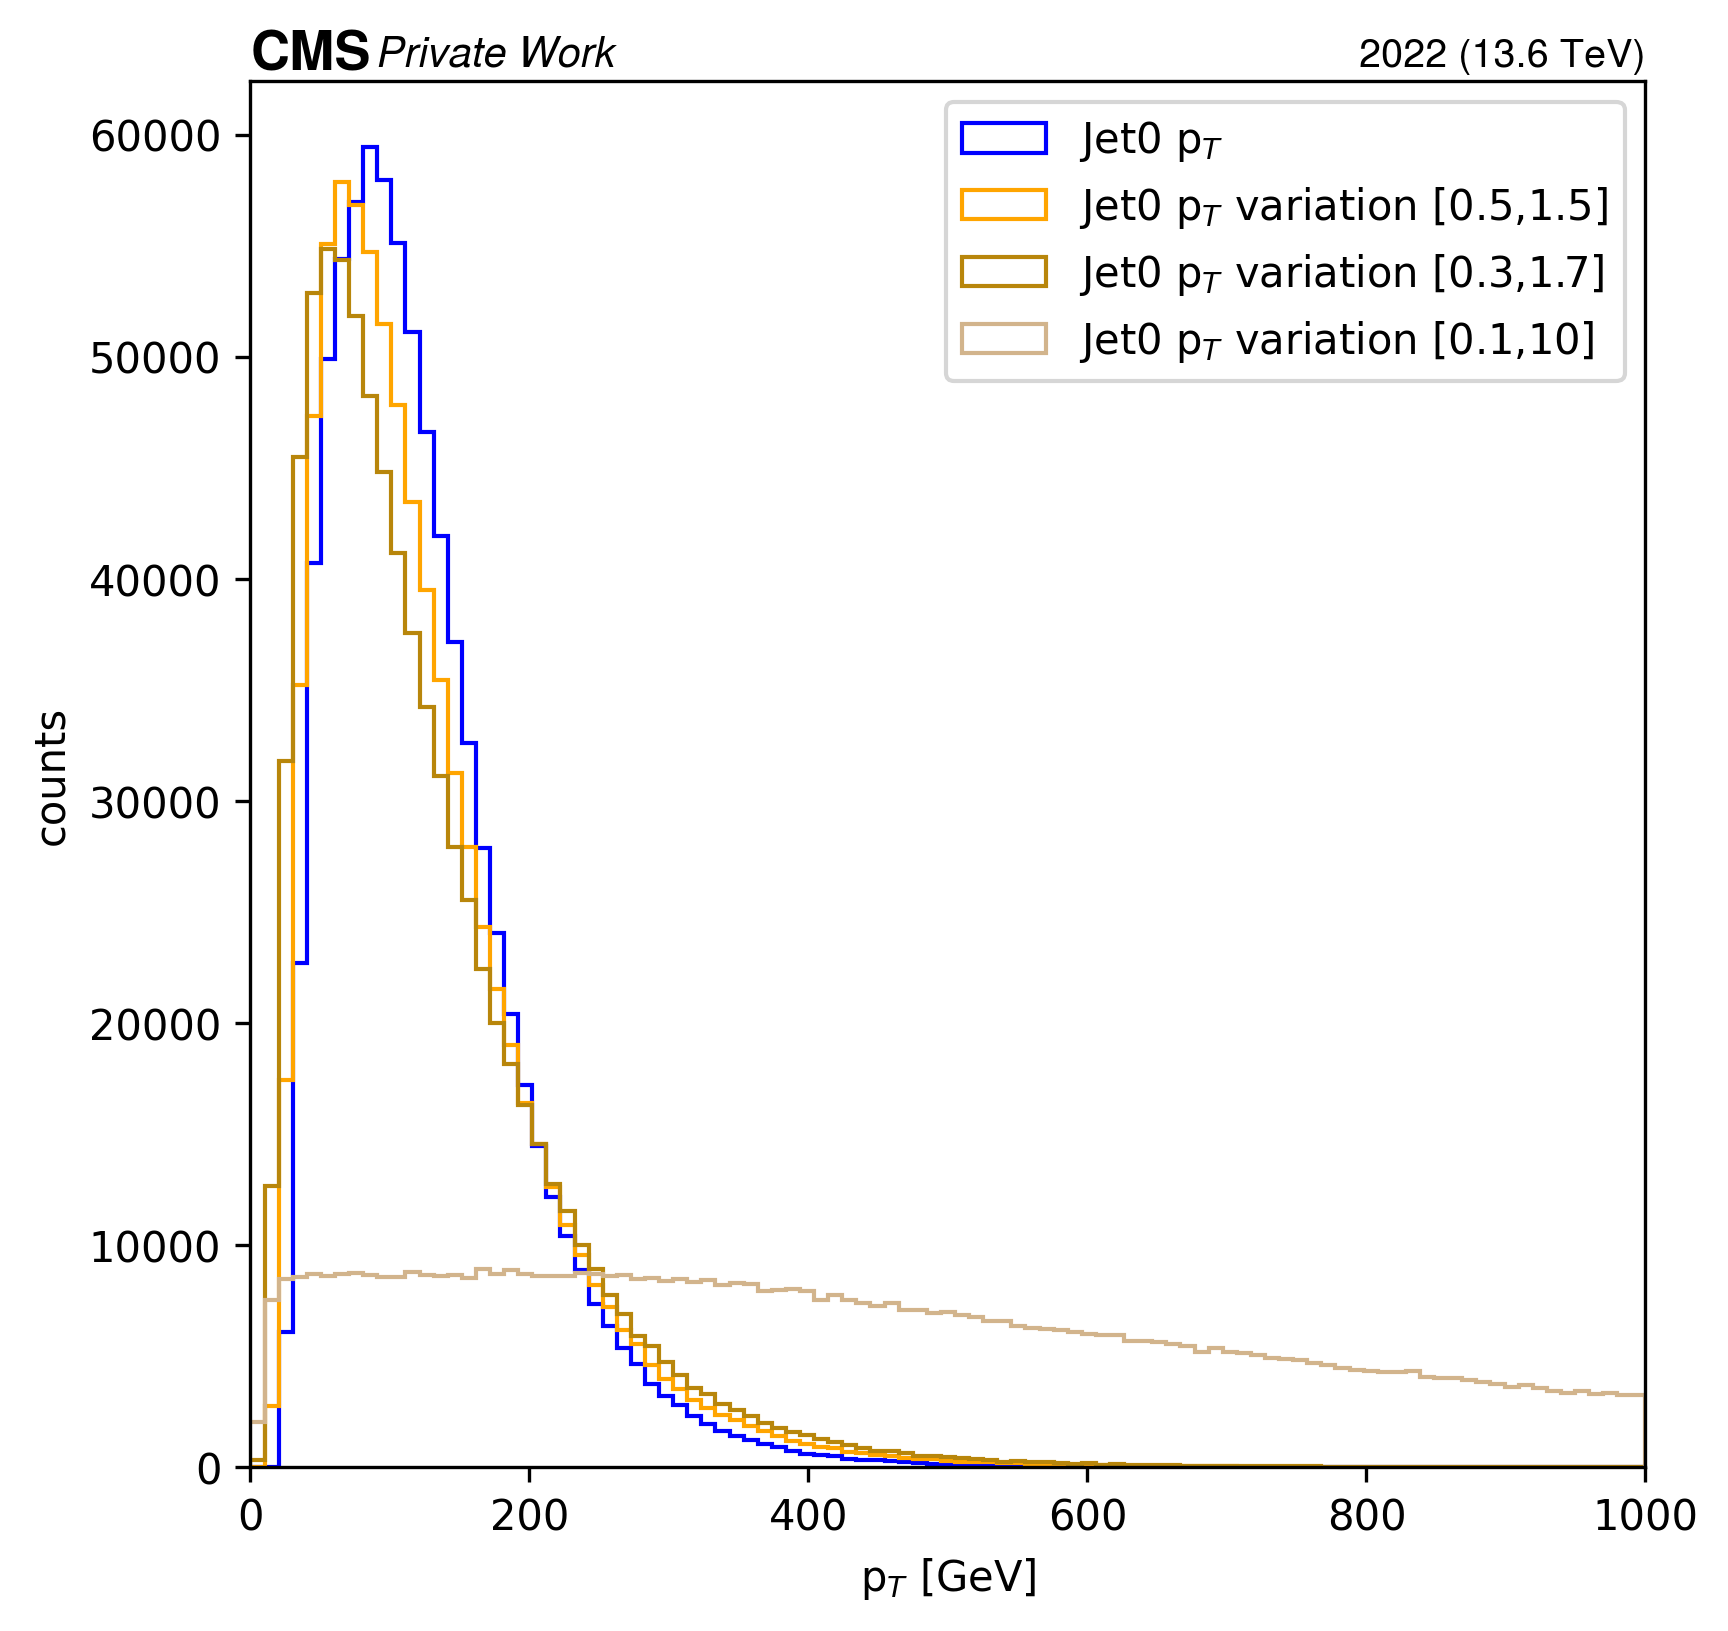

In [13]:
bins = np.linspace(0,1000,100)
fig, ax = plt.subplots(figsize=(6,6))
fig.set_suptitle=("jet_p$_T$ variation")
ax1.set_title=("original p$_T$")
for idx, jet in enumerate([jets_5[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$", linewidth=1, histtype="step", color="blue")
for idx, jet in enumerate([jets_5_05_15[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$ variation [0.5,1.5]", linewidth=1, histtype="step", color="orange")
for idx, jet in enumerate([jets_5_03_17[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$ variation [0.3,1.7]", linewidth=1, histtype="step", color="darkgoldenrod")
for idx, jet in enumerate([jets_5_01_10[0]]):
    jet = jet[jet>0]
    counts, bins = np.histogram(jet, bins=bins)
    ax.hist(bins[:-1],bins,weights=counts, label=f"Jet{idx} p$_T$ variation [0.1,10]", linewidth=1, histtype="step", color="tan")

ax.set_xlabel(r"p$_T$ [GeV]")
ax.set_ylabel(r"counts")
ax.set_xlim(0,1000)
ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax,
    data=True
)

In [7]:

import vector
vector.register_awkward()

n = col_4b["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_orig = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]
print(higgs_orig[0].mass)


[129, 66.1, 104, 122, 132, 111, 131, 85.8, ... 121, 122, 121, 141, 89.6, 135, 98.7]


In [8]:
n = col_4b_05_15["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b_05_15["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b_05_15["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b_05_15["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b_05_15["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b_05_15["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_05_15 = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]

In [9]:
n = col_4b_03_17["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b_03_17["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b_03_17["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b_03_17["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b_03_17["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b_03_17["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_03_17 = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]

In [10]:
n = col_4b_01_10["JetGoodHiggsMatched_N"].value
mass = ak.Array(col_4b_01_10["JetGoodHiggsMatched_mass"].value)
pt = ak.Array(col_4b_01_10["JetGoodHiggsMatched_pt"].value)
eta = ak.Array(col_4b_01_10["JetGoodHiggsMatched_eta"].value)
phi = ak.Array(col_4b_01_10["JetGoodHiggsMatched_phi"].value)
prov = ak.Array(col_4b_01_10["JetGoodHiggsMatched_provenance"].value)

jet_matched_higgs = ak.zip(
    {
        "mass" : mass,
        "pt" : pt,
        "eta" : eta,
        "phi" : phi,
        "provenance" : prov
    },
    with_name="Momentum4D",
)

jet_matched_higgs = ak.fill_none(ak.unflatten(jet_matched_higgs,n),-999)

jet_higgs1 = jet_matched_higgs[jet_matched_higgs.provenance == 1]
jet_higgs2 = jet_matched_higgs[jet_matched_higgs.provenance == 2]
jet_higgs1 = jet_higgs1[ak.argsort(jet_higgs1.pt, axis=1,ascending=False)]
jet_higgs2 = jet_higgs2[ak.argsort(jet_higgs2.pt, axis=1,ascending=False)]

valid_h1 = ak.num(jet_higgs1)>1
valid_h2 = ak.num(jet_higgs2)>1
jet_higgs1 = jet_higgs1[valid_h1]
jet_higgs2 = jet_higgs2[valid_h2]

higgs_01_10 = [jet_higgs1[:,0] + jet_higgs1[:,1], jet_higgs2[:,0] + jet_higgs2[:,1]]

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

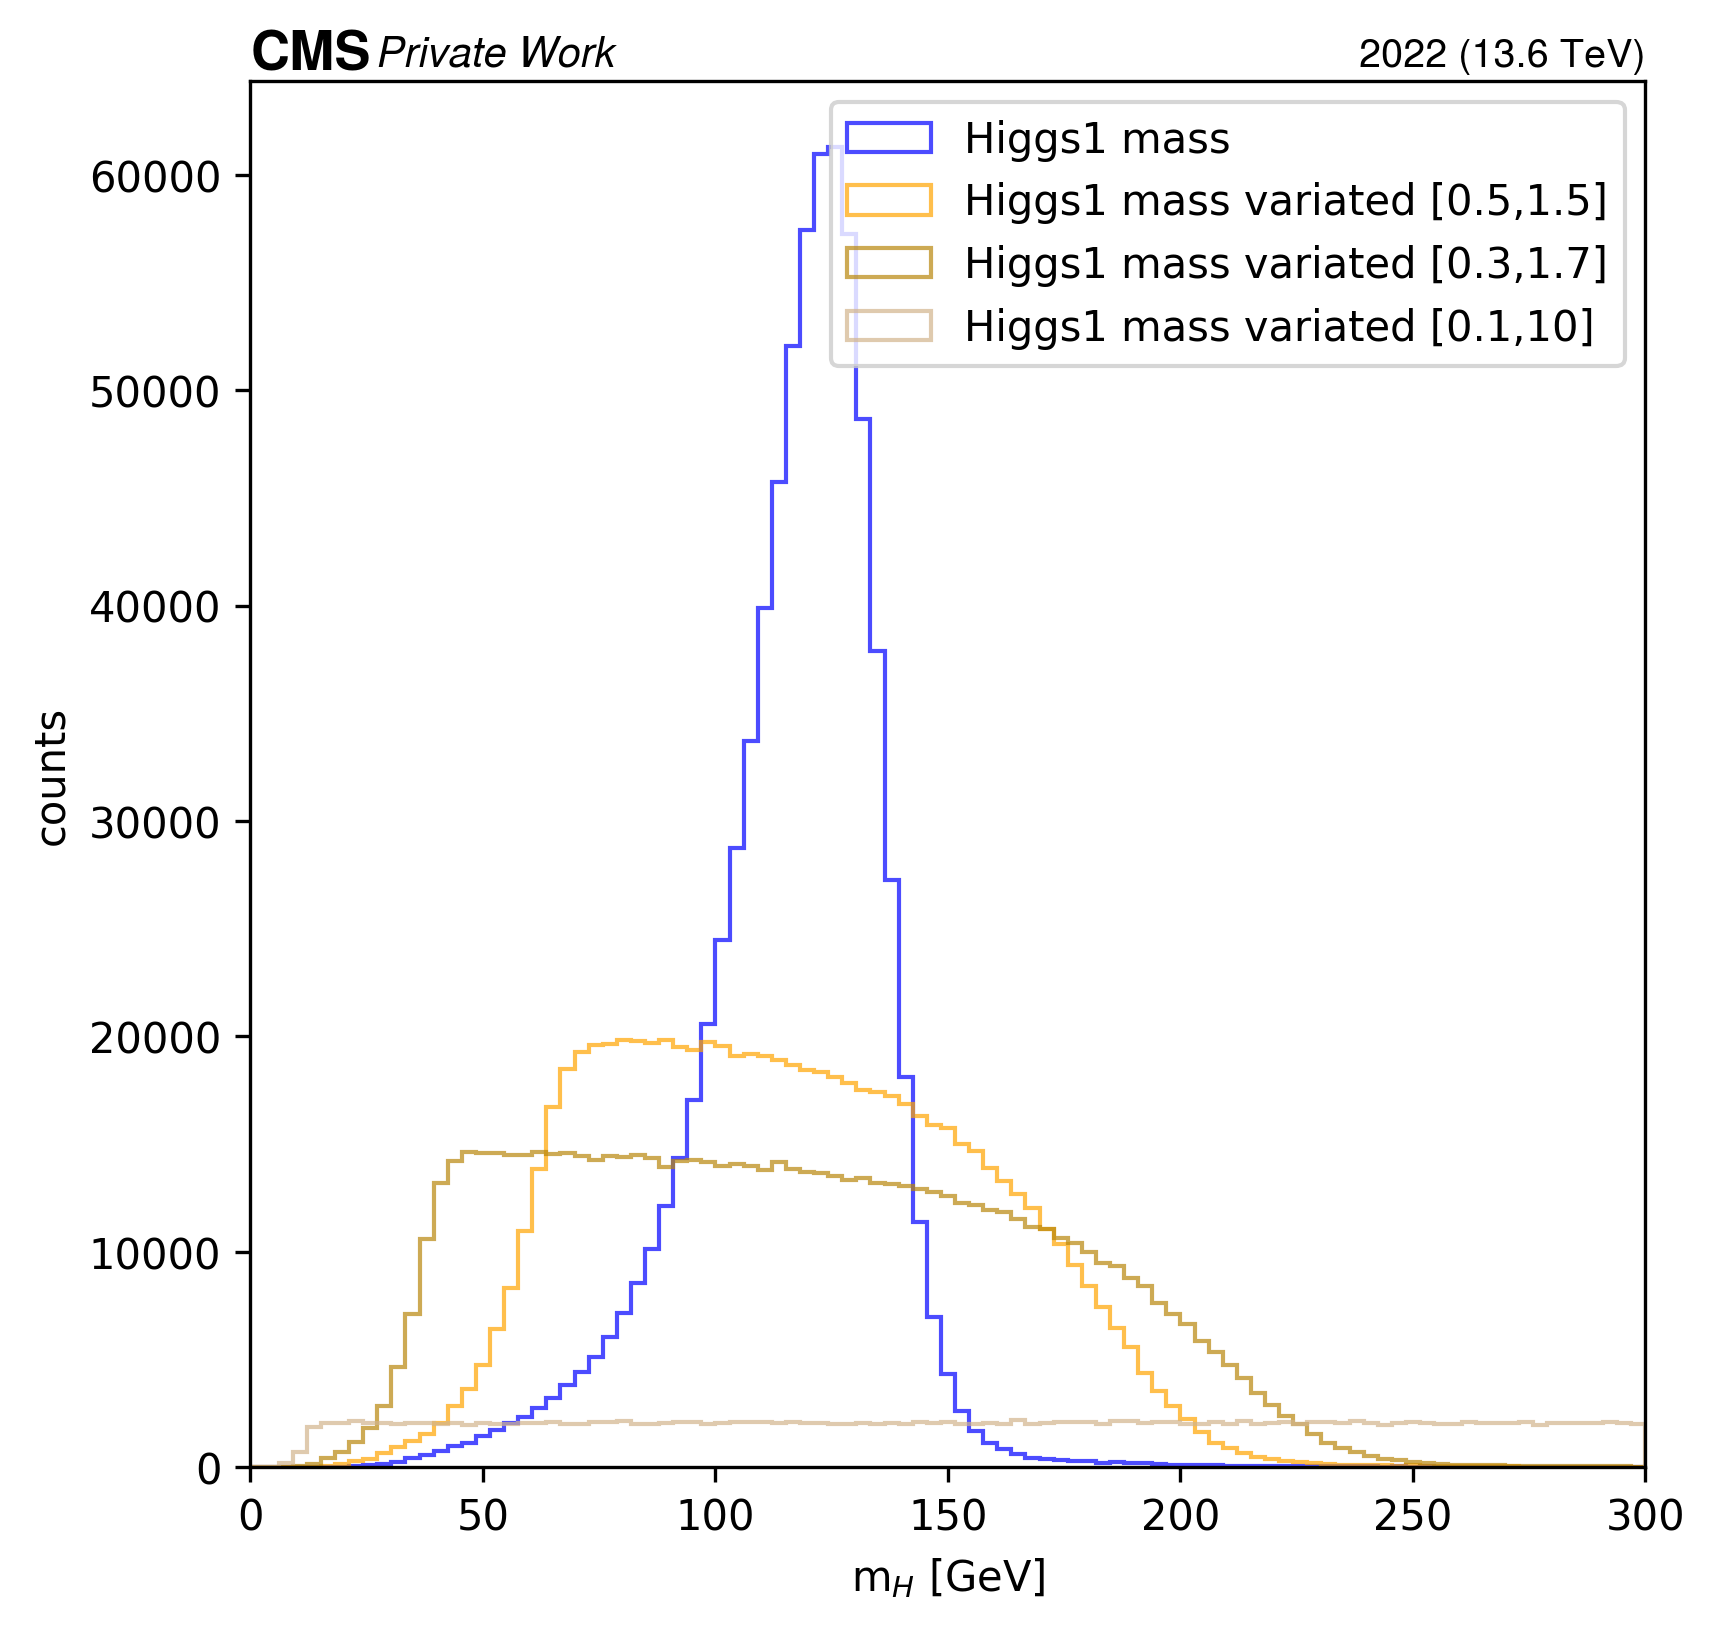

In [11]:
bins = np.linspace(0,300,100)
fig, ax = plt.subplots(figsize=(6,6))
fig.set_suptitle=("Higgs mass variation")

counts, bins = np.histogram(higgs_orig[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass", alpha=0.7, linewidth=1, histtype="step", color="blue")
counts, bins = np.histogram(higgs_05_15[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass variated [0.5,1.5]", alpha=0.7, linewidth=1, histtype="step", color="orange")
counts, bins = np.histogram(higgs_03_17[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass variated [0.3,1.7]", alpha=0.7, linewidth=1, histtype="step", color="darkgoldenrod")
counts, bins = np.histogram(higgs_01_10[0].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs1 mass variated [0.1,10]", alpha=0.7, linewidth=1, histtype="step", color="tan")

ax.set_xlabel(r"m$_H$ [GeV]")
ax.set_ylabel(r"counts")
ax.set_xlim(0,300)
ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax,
    data=True
)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private Work'),
 supptext: Custom Text(1.012, 1, ''))

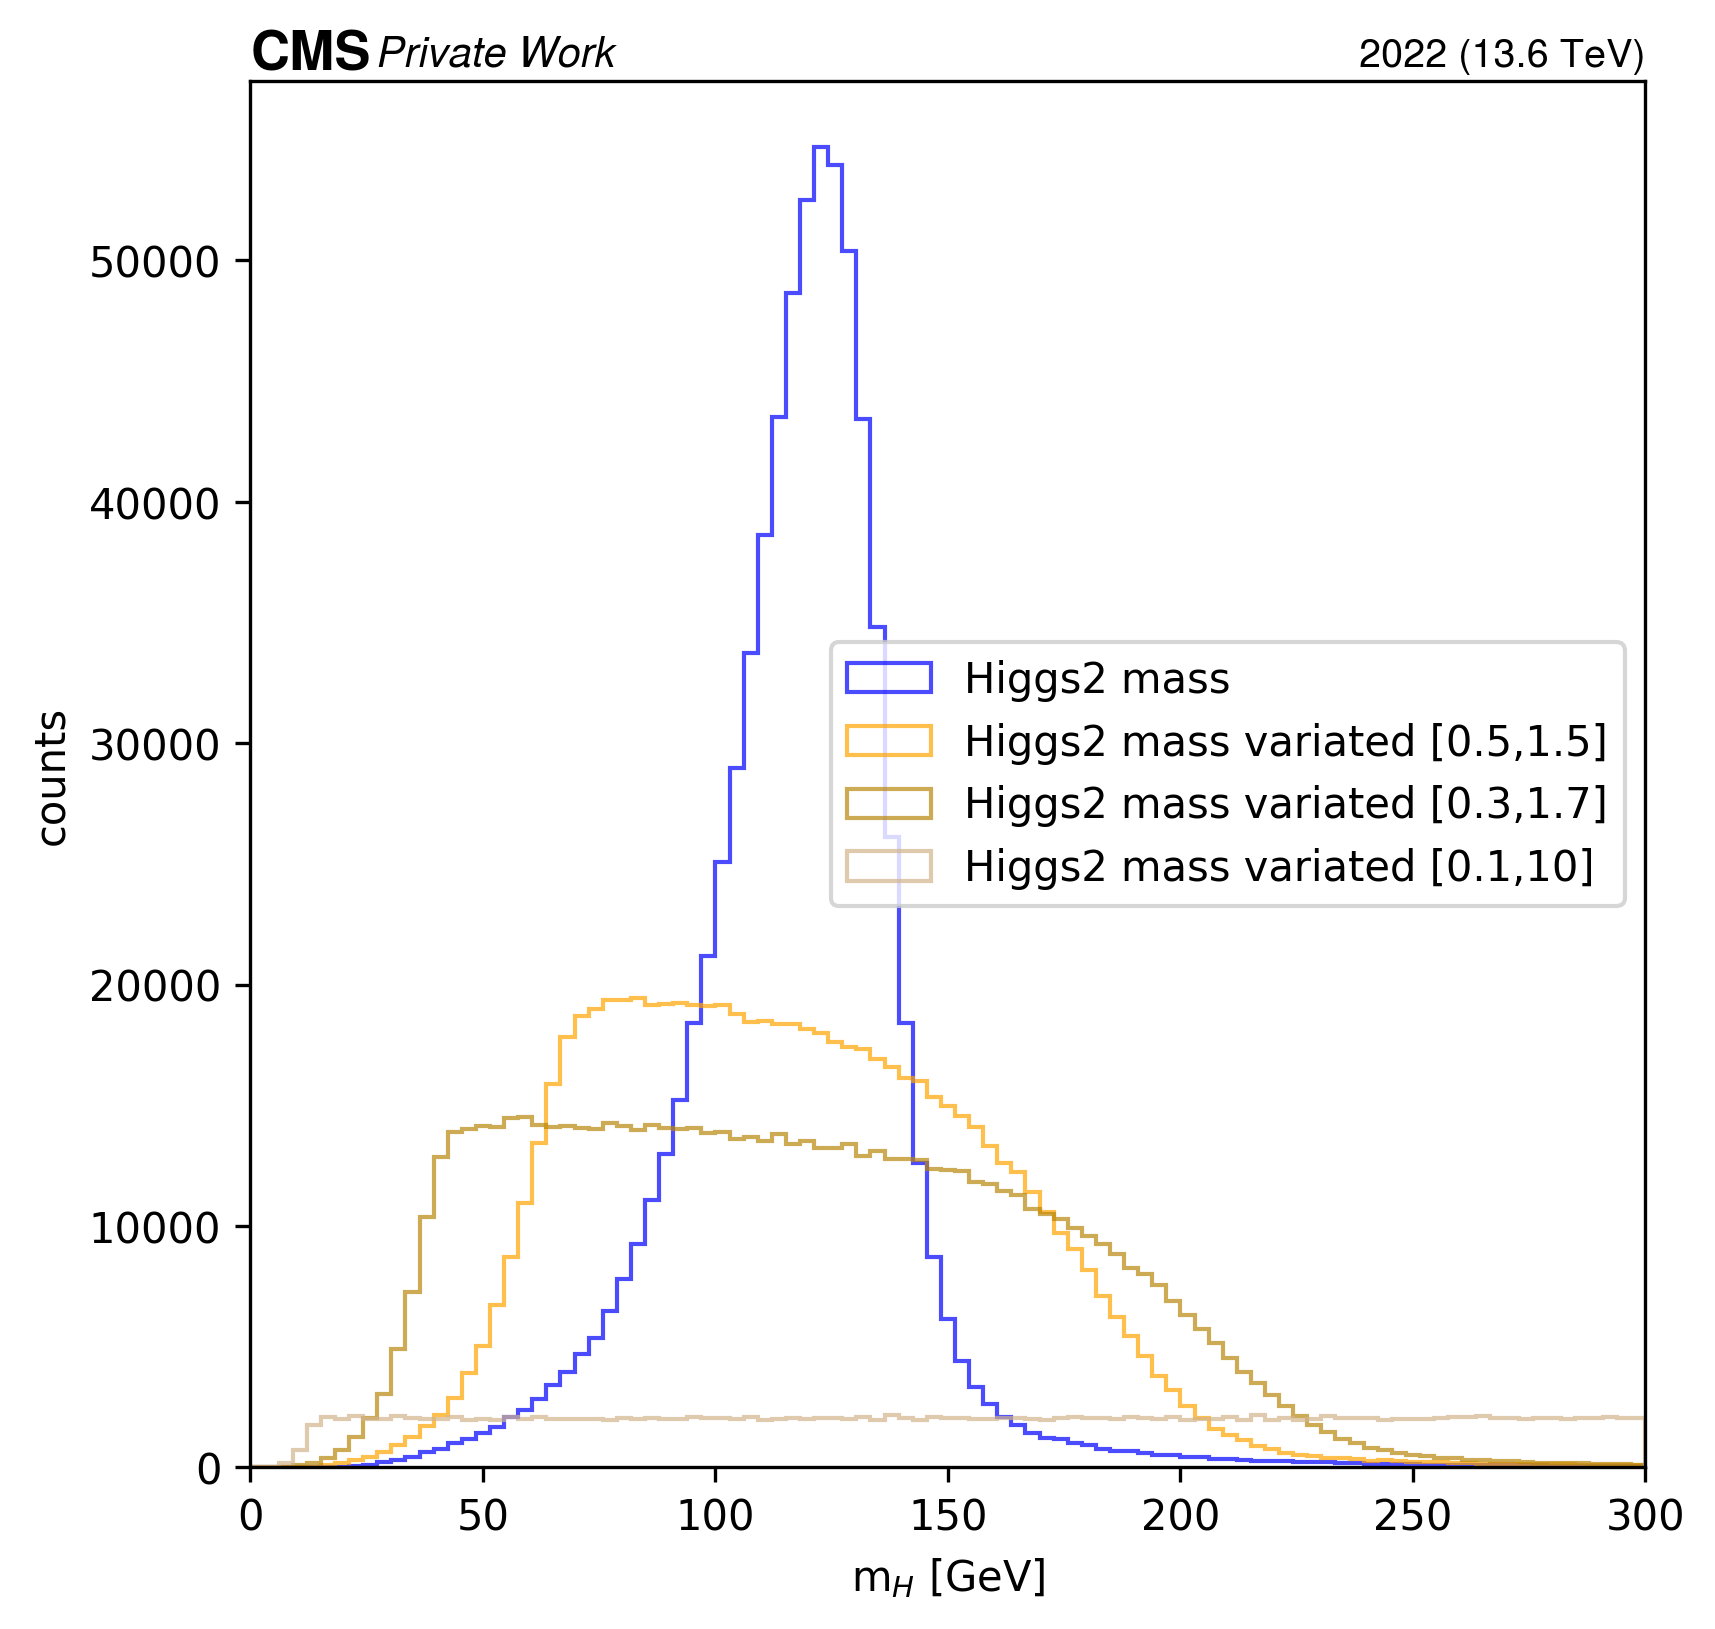

In [12]:
bins = np.linspace(0,300,100)
fig, ax = plt.subplots(figsize=(6,6))
fig.set_suptitle=("Higgs mass variation")

counts, bins = np.histogram(higgs_orig[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass", alpha=0.7, linewidth=1, histtype="step", color="blue")
counts, bins = np.histogram(higgs_05_15[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass variated [0.5,1.5]", alpha=0.7, linewidth=1, histtype="step", color="orange")
counts, bins = np.histogram(higgs_03_17[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass variated [0.3,1.7]", alpha=0.7, linewidth=1, histtype="step", color="darkgoldenrod")
counts, bins = np.histogram(higgs_01_10[1].mass, bins=bins)
ax.hist(bins[:-1],bins,weights=counts, label=f"Higgs2 mass variated [0.1,10]", alpha=0.7, linewidth=1, histtype="step", color="tan")

ax.set_xlabel(r"m$_H$ [GeV]")
ax.set_ylabel(r"counts")
ax.set_xlim(0,300)
ax.legend()
# TODO: change title

hep.cms.label(
    year="2022",
    com="13.6",
    label=f"Private Work",
    ax=ax,
    data=True
)